# What is linear algebra?

**Linear algebra** is the study of systems of *linear* equations. 

After completing this notebook, you'll be able to:
* Create a vector using NumPy, compute its length, and visualize it
* Compute the dot product between two vectors
* Normalize the dot product to calculate a correlation coeffeicient
* Construct and multiply matrices in Python
* Create and manipulate special cases of matrices (unit matrix, diagonal matrix)
* Explain matrices as a linear transformation and relate matrix properties to properties of that linear transformation
* Define what eigenvalues/eigenvectors are and determine them using Python

<hr>

## Setup
Below, we'll import a custom module with some **helper functions** to easily visualize vectors.

In [1]:
# Import modules, including a custom one!
from Modules import linear_algebra, matrices
import numpy as np

# Check imports
%whos

Variable         Type      Data/Info
------------------------------------
linear_algebra   module    <module 'Modules.linear_a<...>dules/linear_algebra.py'>
matrices         module    <module 'Modules.matrices<...>P24/Modules/matrices.py'>
np               module    <module 'numpy' from '/op<...>kages/numpy/__init__.py'>


## Vectors

We can build **vectors**, a one-dimensional array of numbers, using NumPy. Below, we'll generate a row vector and column vector. We will also check the vector's *mathematical* **dimensionality** (using `len()` or the `shape` attribute), compared to its dimensionality as a NumPy array (using the `ndim` attribute).

**Note**: A vector created without the extra brackets (e.g. `np.array([1,2,3])`) would be orientationless. Sometimes this is okay, but sometimes we need to be extra clear about the orientation.

In [2]:
array = np.array([1,2,3])

# Check ndim and shape
print(array.ndim)
print(array.shape)

1
(3,)


In [3]:
row_vector = np.array([ [ -1, 0, 2, 3.1] ])

# Check ndim and shape
print(row_vector.ndim)
print(row_vector.shape)

row_vector

2
(1, 4)


array([[-1. ,  0. ,  2. ,  3.1]])

In [4]:
column_vector =  np.array([ [1],[2],[3] ])
# Check ndim and shape
print(column_vector.ndim)
print(column_vector.shape)
column_vector

2
(3, 1)


array([[1],
       [2],
       [3]])

### Transposing vectors (or matrices)

To transpose a vector or matrix, we can use [`transpose()`](https://numpy.org/doc/stable/reference/generated/numpy.matrix.transpose.html) or simply`T`.

In [5]:
# Transpose our vectors
column_vector.T

array([[1, 2, 3]])

### Coordinate vectors
When our origin is at zero, we can also use arrays to store coordinates. Below, we'll use NumPy to create two arrays which represent the coordinates for two vectors.

In [6]:
# Note that here we don't need to worry about vector orientation (row vs. column), 
# so for simplicity the vectors are created orientationless.

v1 = np.array([2, 4])
v2 = np.array([2, -2])

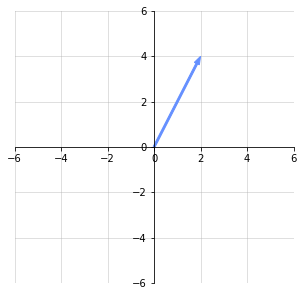

In [7]:
# Use the function we imported to visualize
#linear_algebra.visualize_vectors(v1)
linear_algebra.visualize_vectors(v1)

### Vector addition, subtraction, and scalar multiplication

<div class="alert alert-success"><b>Tasks:</b> 
    
* Add vectors v1 and v2. 
* Subtract vectors v1 and v2. 
* Multiply v2 by a scalar of 3.
    
    For each of these, you can use our <code>visualize_vectors</code> function to see the resulting array.
    
    </div>

In [8]:
v2*3

array([ 6, -6])

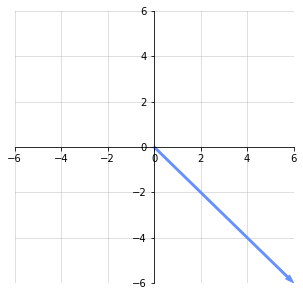

In [9]:
# Manipulate vectors here
#linear_algebra.visualize_vectors(v1+v2)
#linear_algebra.visualize_vectors(v1-v2)
linear_algebra.visualize_vectors(v2*3)

### Normalizing vectors

A vector is **normalized** when *each element* in the vector is divided by the length. Note that length here *is not* how many elements are in the vector! It is the *actual* length of the vector. Thankfully, there's a NumPy function that can help us compute length: [`np.linalg.norm()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html). The **norm** is a measure of the size or length of a vector or matrix in linear algebra. It is a generalization of the concept of the magnitude of a vector in Euclidean space.

Let's see if we can normalize by division.

In [10]:
v1_length = np.linalg.norm(v1) # compute norm (aka magnitude or length)
v1_length 

4.47213595499958

We can compare the length we get above to the output of the Pythagoream theorem. *Hint*: use `np.sqrt()`.

In [11]:
# Compare norm to Pythagoream
[2, 4]

np.sqrt(2**2+4**2)

4.47213595499958

Finally, we will divide the original vector by the length.

In [12]:
normalized_vector = v1 / v1_length
normalized_vector

array([0.4472136 , 0.89442719])

In [13]:
# Check the magnitude of the new vector! Is this a unit vector?
np.linalg.norm(normalized_vector)

0.9999999999999999

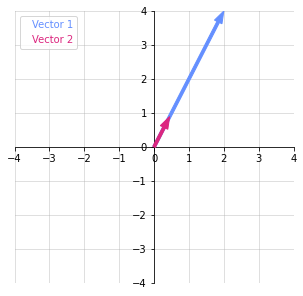

In [14]:
# Visualize v1 alongside the new, unit vector
linear_algebra.visualize_vectors(v1,normalized_vector)

<div class="alert alert-success"><b>Task:</b> Write a function, <code>normalize_vector</code> that takes any vector and normalizes it. What happens if you give it the zeros vector?</div>

In [15]:
# Write your function here

def normalize_vector(vector):
    
    vector_length = np.linalg.norm(vector)
    normalized_vector = vector / vector_length
    
    return normalized_vector

In [16]:
normalized_vector = normalize_vector(np.array([1,1]))
normalized_vector

array([0.70710678, 0.70710678])

Finally, we can combine addition, subtraction, and scalars to create linear combinations of vectors.

In [17]:
# Linear combinations


## Linear Algebra Functions

One of the most important operations in linear algebra is the dot product. First, let's show how dot products work between vectors. Below, we'll use `np.dot()`. **Note**: This function technically implements matrix multiplication, a collection of dot products.

In [18]:
v = np.array([1,2,3,4])
w = np.array([5,6,7,8])
np.dot(v,w)

70

### Special dot product observations

<div class="alert alert-success"><b>Task:</b> Below, create two vectors that are <b>orthogonal</b>. Then, compute their dot product.</div>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Perpendicular-coloured.svg/220px-Perpendicular-coloured.svg.png)

In [19]:
# Create vectors here
v1 = np.array([1,2])
v2 = np.array([2,-1])

np.dot(v1,v2)

0

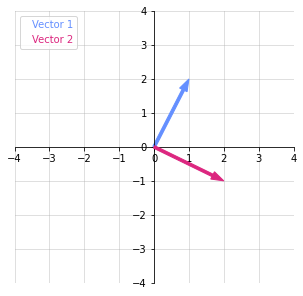

In [20]:
linear_algebra.visualize_vectors(v1,v2)

<div class="alert alert-success"><b>Task:</b> Is the dot product <b>commutative</b>? Commutative means that $a*b == b*a$. Test this below.</div>

(See a full elaboration on this [here](https://youtu.be/LyGKycYT2v0?si=FBmISeSy6Wjs_v22)!)

In [21]:
# Test commutative
np.dot(v2,v1)

0

### Computing correlations
The magnitude of the dot product indicates the strength of similarity between two vectors, but it is *also* is related to the magnitude of the numerical values in the data.

Let's demonstrate that using two vectors. One gives the height and weight of two different people in inches and grams, and the second gives the height and weight of those same in feet and pounds.

In [22]:
pounds = np.array([130,150,200,210])
grams = pounds*453.592

inches = np.array([64,76,90,80])
feet = inches/12

print(np.dot(inches,grams))
print(np.dot(feet,pounds))

24729835.839999996
4543.333333333333


So, if we want to compute a meaningful value that isn't simply reflecting the magnitude of the vectors, we need to normalize these dot products by doing the following:

1. Mean centering each variable: subtracting the average value from each data value. *This is the same as computing the norm!*
2. Dividing the dot product by the product of the vector norms. This divisive normalization cancels the measurement units and scales maximum possible correlation magnitude to 1.

In [23]:
def normalize_dot(x,y):

    # Mean center each value
    x_m  = x-np.mean(x)
    y_m  = y-np.mean(y)

    num = np.dot(x_m,y_m) # numerator
    den = np.linalg.norm(x_m) * np.linalg.norm(y_m) # denominator
    cor = num / den
    
    return cor

In [24]:
#normalize_dot(grams,inches)
normalize_dot(pounds,feet)

0.8386003382212673

Of course, given that computing a correlation is a very common data analysis approach, this is built into the **stats** module of the SciPy package. We can compare our results above to the use of [`stats.pearsonr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html): 

In [25]:
from scipy import stats

statistic, pvalue = stats.pearsonr(pounds,feet)
print(statistic, pvalue)

0.8386003382212673 0.16139966177873266


## Matrices

A **matrix** is a rectangular array of numbers. The numbers in the matrix are **entries**. We can refer to each of the entries by their row and column.
```
A = [-1 -6  2
      0  8  1]
```
You will sometimes see matrices referred to in mathematical notation. For example, a matrix $A$ could be denoted by $A = (a_{ij})$ where $a_{ij}$  is the entry in the $i^{th}$ row and $j^{th}$ column of matrix $A$. So for the matrix above, $A_{23}$ == 1.

The **size** of the matrix is the number of rows multipled by the number of columns. $A$ is a 2x3 matrix, with a total size of 6. If a matrix has the same number of rows and columns, it is a **square** matrix. If it only has a dimension of one in one direction (e.g. 3x1), it is a **column matrix** (or **column vector**). 

The **transpose** of a matrix switches its rows and columns. The transpose (^T, or $^T$) of matrix $A$ above would be:
```
A^T = [-1 0
       -6 8
        2 1]
```

### Buiding matrices in NumPy
We can build matrices in Python using numpy, using the following notation (notice there are parentheses to denote the array function, with brackets inside to indicate a list, with brackets inside *those* brackets for each row):

```
my_matrix = np.array([[row_1],[row_2],...[row_n]])
```


In [26]:
# Build a 3x3 matrix
my_matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Other useful matrix functions:
* `np.random.randint()` builds a random matrix
* `np.eye()` builds an **identity matrix**
* `np.zeros()` builds a matrix of zeros
* `np.ones()` builds a matrix of ones
* `np.diag()` builds a **diagonal matrix**

**Note**: Each of these differ in the inputs they take to instruct their size and shape -- always refer to the documentation!

We can also do matrix multiplication. In Python, we can use the `@` operator for matrix/vector multiplications. We can also use the NumPy [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot), [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html). See the documentation for their differences.

In [27]:
# Create a random matrix
random_matrix = np.random.randint(low=1,high=10,size=3)
print(random_matrix)

# Use matmul for matrix multiplication
np.matmul(my_matrix,random_matrix)

[3 6 9]


array([ 42,  96, 150])

### Solving linear equations (abstract example):

Let's say we have the following system of linear equations that we'd like to solve:

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x - 5y + 2z = -4$

We can use the inverse method, implemented using `np.linalg.inv()`. The **inverse** of a matrix (e.g., of $M$) is one that can be multiplied by it to produce an identity matrix. This is how we "cancel" a matrix in order to solve problems in the form $ Ax = b $.

In [28]:
M = np.array([[4,3,2],[-2,2,3],[3,-5,2]]) # 3x3 co-efficients matrix
K = np.array([[25],[-10],[-4]])           # column matrix
V = np.array([['x'],['y'],['z']])         # unknown matrix

$ M \cdot V = K $

so,

$ V = M^{-1} \cdot K$

In [29]:
V = np.linalg.inv(M).dot(K)
V

array([[ 5.],
       [ 3.],
       [-2.]])

### Coding Exercise 1.1: Understanding neural transformations using linear equations

We will look at a group of 2 LGN neurons which get input from 2 retinal neurons: we will call the population of LGN neurons population $p$. Below, we have the system of linear equations that dictates the neuron models for each population. $r_1$ and $r_2$ correspond to the retinal neural activities (of neuron 1 and 2). $g_{p_1}$ and  $g_{p_2}$ correspond to the responses of the LGN neurons 1 and 2 in population $p$.

\begin{align}
r_1 + 3r_2 &= g_{p_1} \\
2r_1 + r_2 &= g_{p_2}
\end{align}

<br>

<div class="alert alert-success"><b>Tasks:</b>
    
1. Cast each equation (i.e., $g_{p_1}$ and $g_{p_2}$) as a matrix-vector multiplication:

\begin{equation}
\mathbf{g}_p = \mathbf{P}\mathbf{r}
\end{equation}

where $P$ is the weight matrix to population $p$.

2. Let's say we only recorded from the LGN cells (and know the weight matrix) and are trying to figure out how the retinal cells responded. Solve the matrix equation for the given LGN activities:

\begin{equation}
\mathbf{g}_p =
\begin{bmatrix}
16 \\
7
\end{bmatrix}
\end{equation}
</div>
<br>

In [30]:
# Create P (using np array) -- coefficient matrix!
P = np.array([[1,3],[2,1]])

# Create g_p (using np array) 
g_p = np.array([16,7])

# Solve for r (using np.linalg.inv)
r = np.linalg.inv(P).dot(g_p)

# Print r
print(r)

[1. 5.]


You can recover how the retinal neurons respond given the weight matrix and LGN responses! You have solved the system of equations using matrices. We can't always do this though: let's say we have a different group of 2 LGN neurons -  population q - with the following weight matrix from the retinal neurons.

\begin{equation}Q =
\begin{bmatrix}
4 & 1 \\
8 & 2
\end{bmatrix}
\end{equation}

As you can see if you run the next code cell, we get an error if we try to invert this matrix to solve the equation

In [31]:
g_q = np.array([16, 7])
Q = np.array([[4, 1], [8, 2]])

print(np.linalg.inv(Q) @ g_q)

LinAlgError: Singular matrix

## Matrices as linear transformations

For now, let's start to think about all of this as **[linear transformations of matrices](https://www.youtube.com/watch?v=N6UUV9tVIr8)**. 

Matrices can be thought of as enacting linear transformations. When multiplied with a vector, they transform it into another vector. In fact, they are transforming a grid of space in a linear manner: the origin stays in place and grid lines remain straight, parallel, and evenly spaced.

### Coding Exercise 1.2: Creating matrices for transformations

<div class="alert alert-success"><b>Tasks:</b>

1. Come up with a matrix $A$ for which the corresponding linear transformation is reflection through the $y$ axis (flipping across the $y$ axis). For example, $\mathbf{x} = \begin{bmatrix}
2 \\
6  \\
\end{bmatrix}$ should become $\mathbf{b} = \begin{bmatrix}
-2 \\
6  \\
\end{bmatrix}$ when multiplied with $A$.
2. Come up with a matrix $B$ for which the corresponding linear transformation is projecting onto the $x$ axis. For example, $\bar{x} = \begin{bmatrix}
2 \\
3  \\
\end{bmatrix}$ should become $\bar{b} = \begin{bmatrix}
2 \\
0  \\
\end{bmatrix}$ when multiplied with $B$.

</div>

**Remember to think about where your basis vectors should end up! Then your matrix consists of the transformed basis vectors. Drawing out what you want to happen can help**

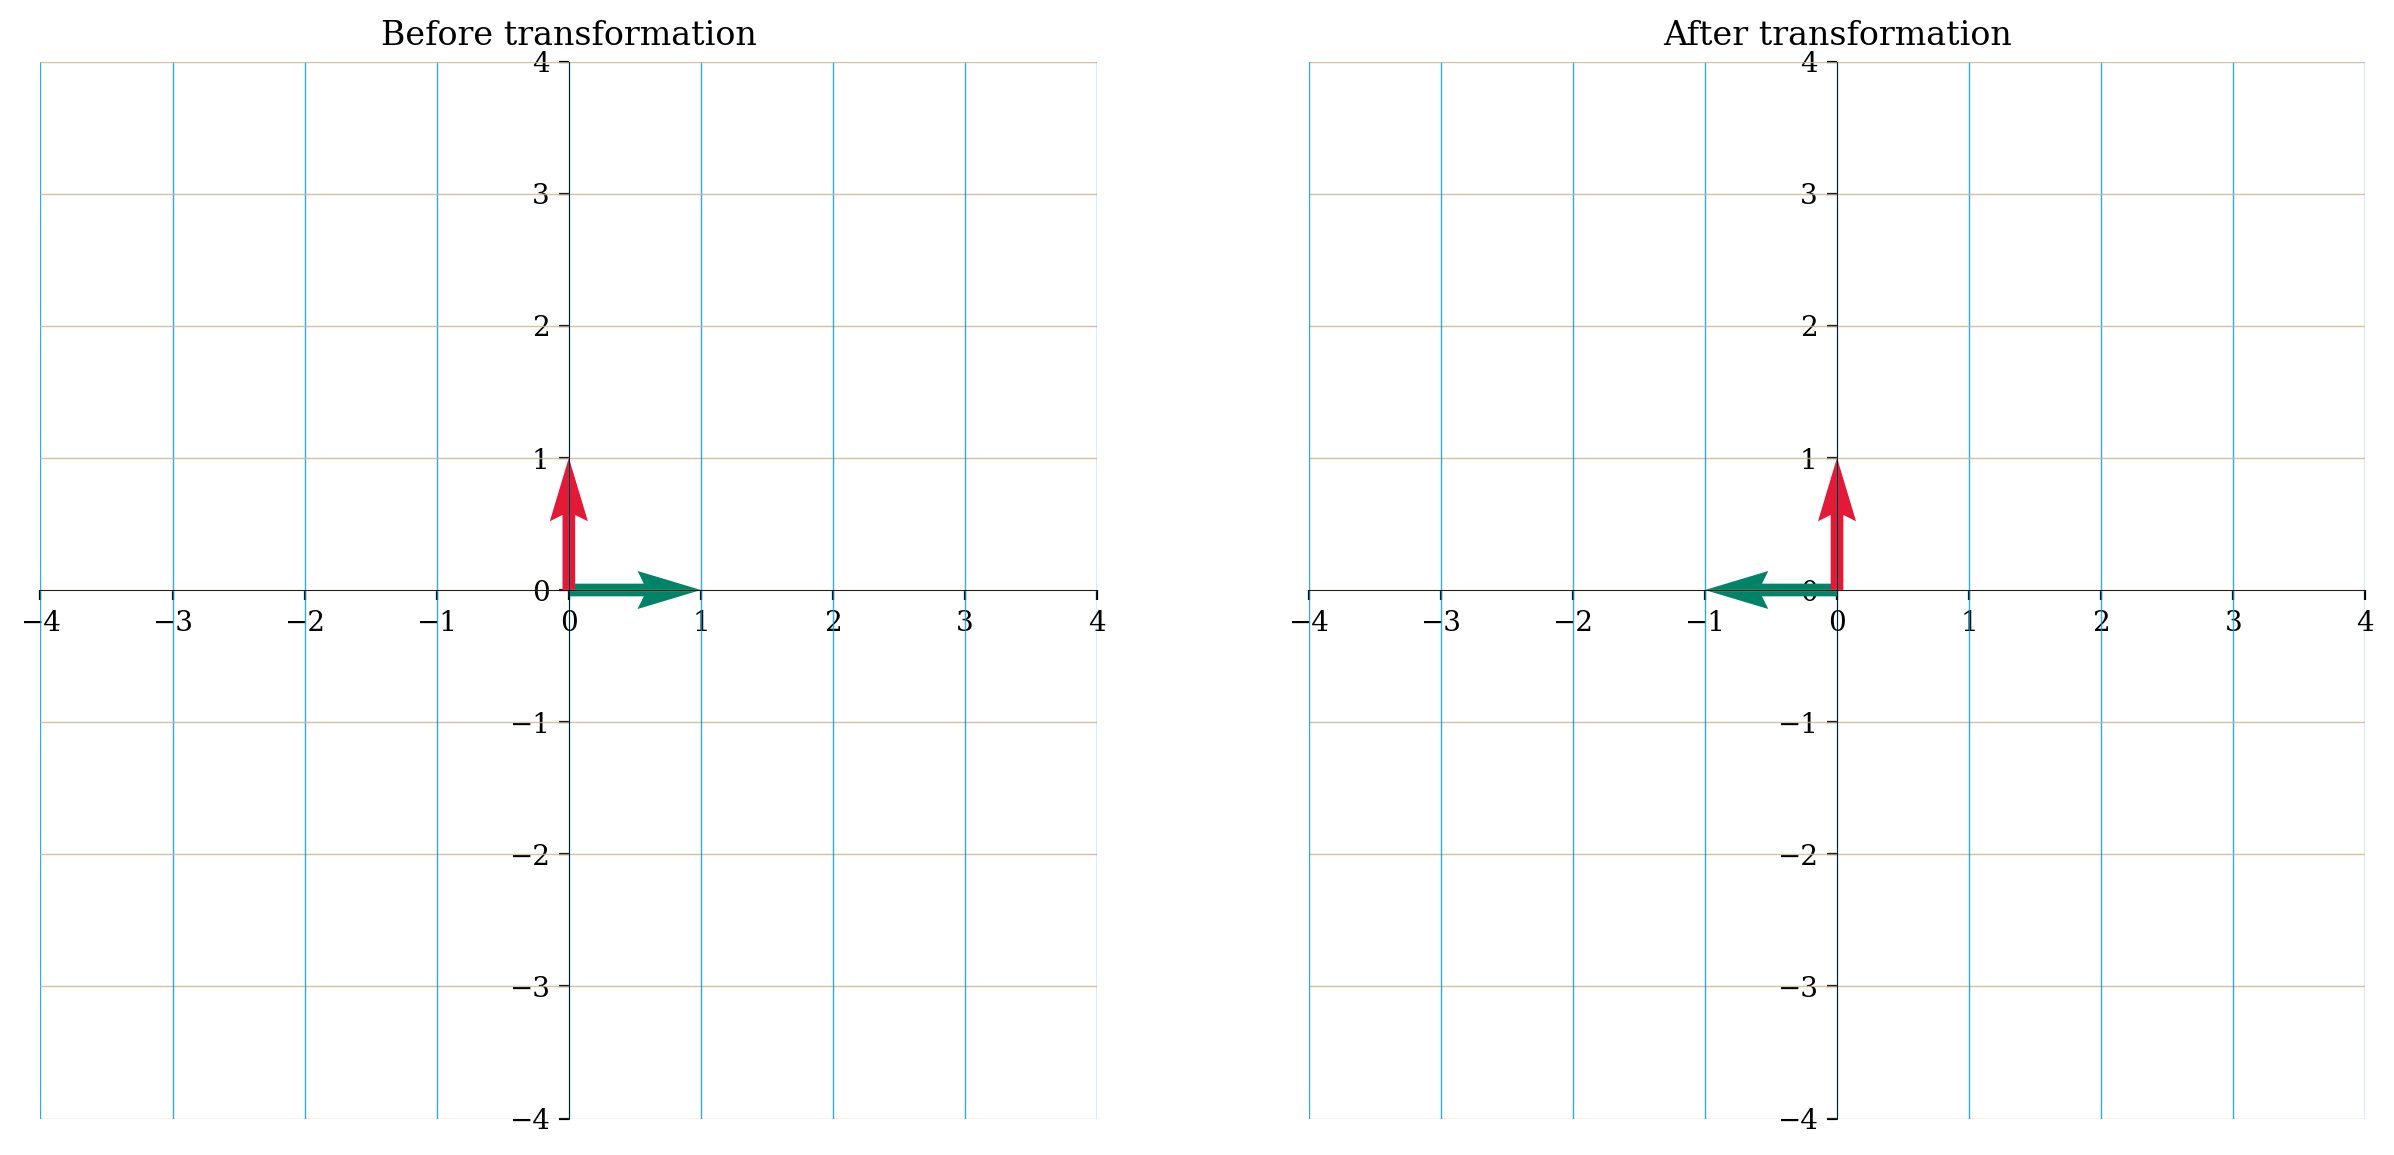

In [32]:
A = np.array([[-1,0],[0,1]])

# Uncomment to visualize transformation
matrices.plot_linear_transformation(A)

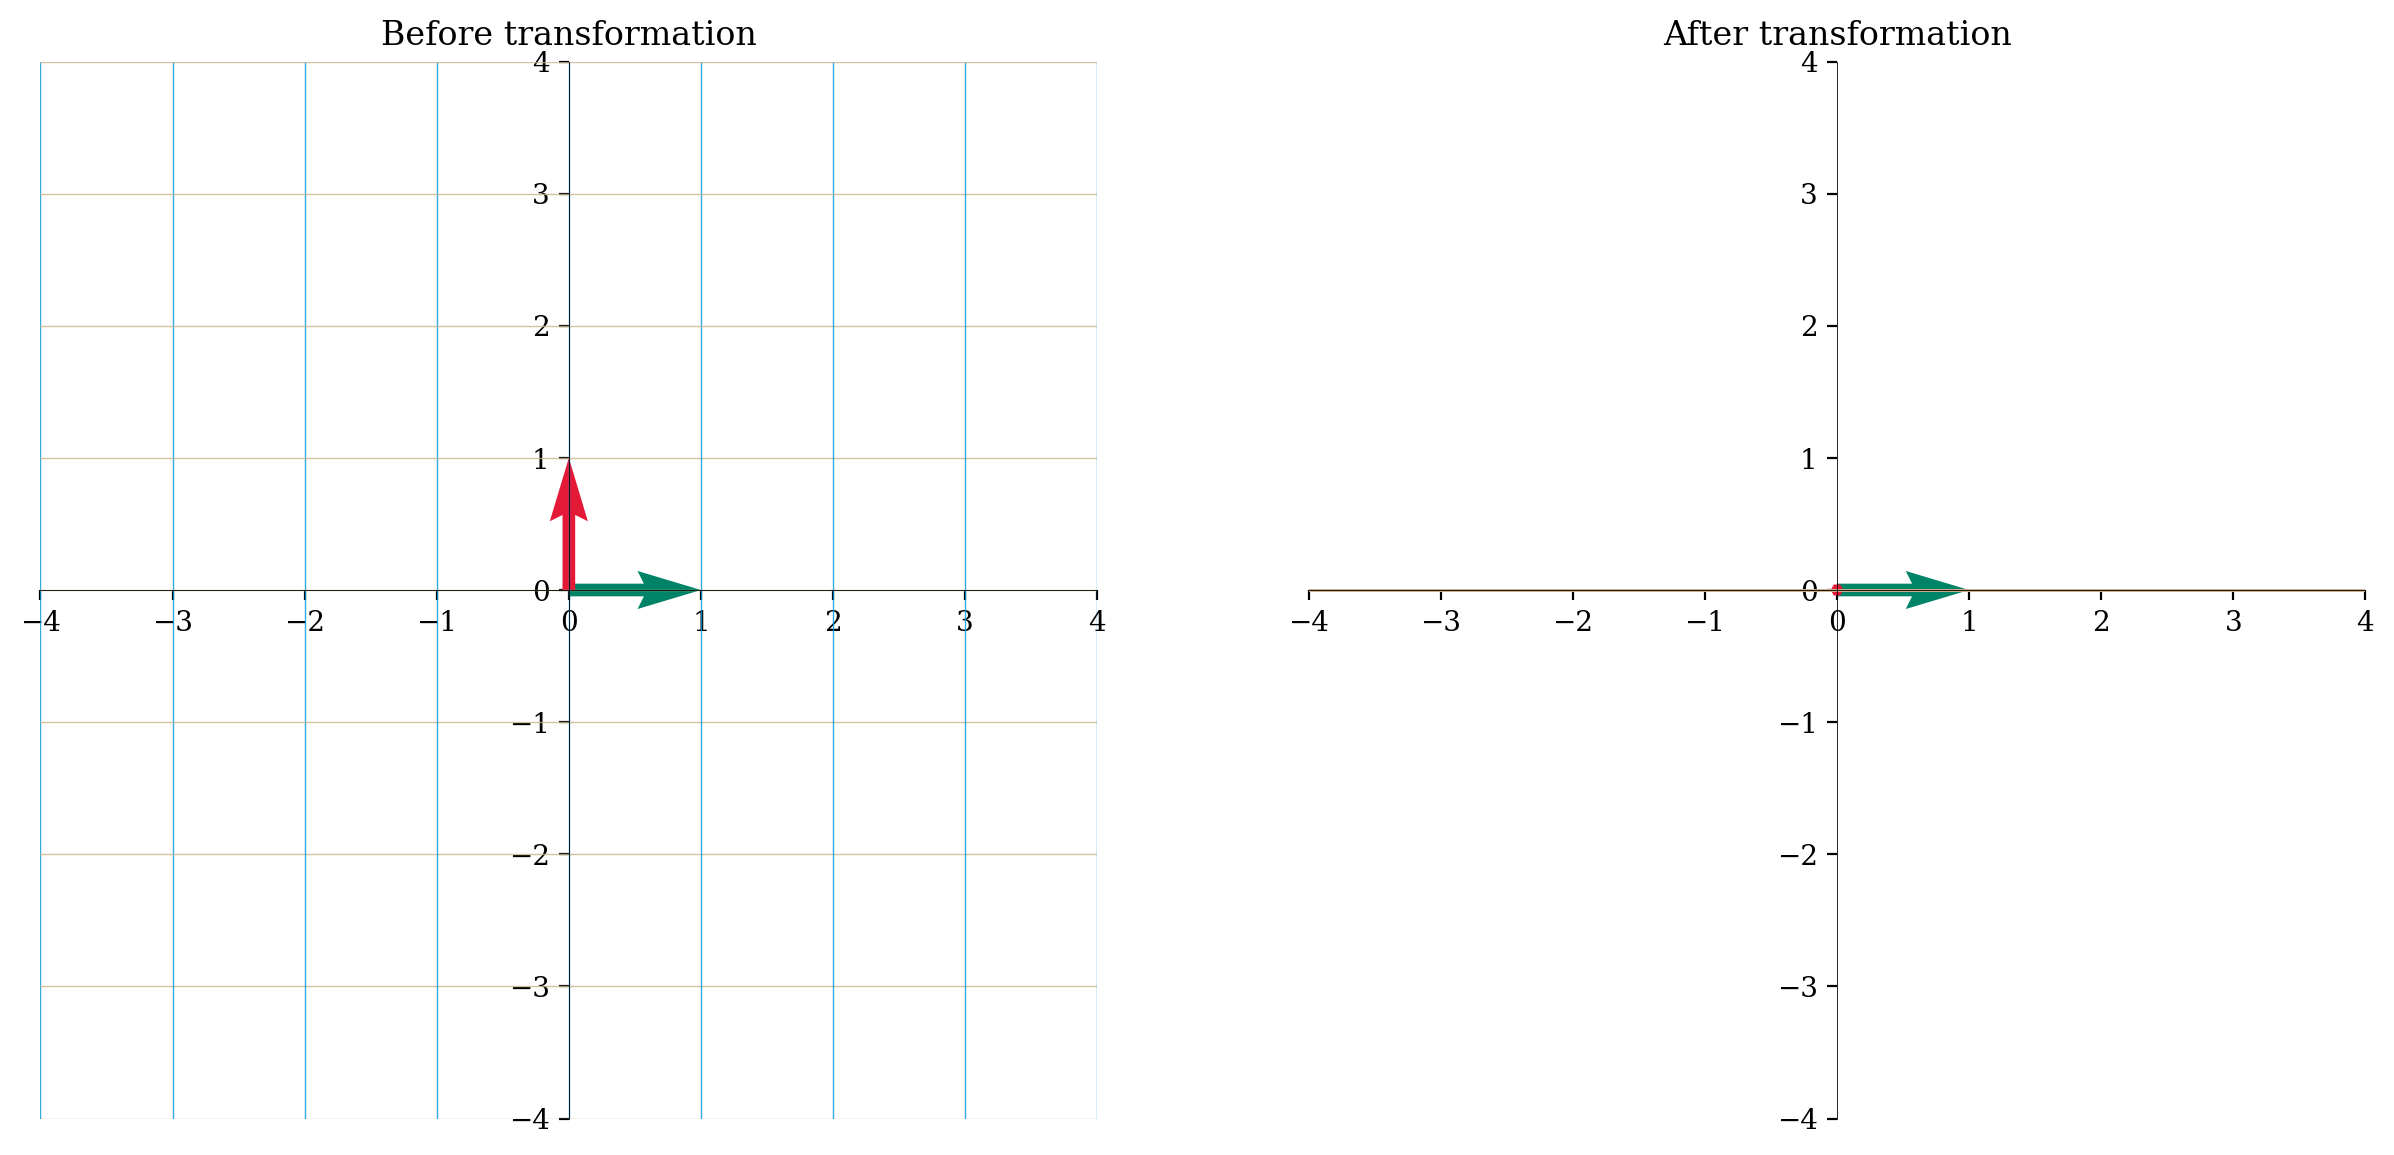

In [33]:
B = np.array([[1,0],[0,0]])

# Uncomment to visualize transformation
matrices.plot_linear_transformation(B)

## Eigenvalues & Eigenvectors

[**This video**](https://www.youtube.com/watch?v=l-c7ptT7znM) covers eigenvalues and eigenvectors.

Eigenvectors $\mathbf{v}$ of a matrix $\mathbf{W}$ are vectors that, when multipled by the matrix, equal a scalar multiple of themselves. That scalar multiple is the corresponding eigenvalue $\lambda$.

\begin{equation}
\mathbf{W}\mathbf{v} = \lambda\mathbf{v}
\end{equation}

If we have one eigenvector for a matrix, we technically have an infinite amount: every vector along the span of that eigenvector is also an eigenvector. So, we often use the unit vector in that direction to summarize all the eigenvectors along that line.

We can find the eigenvalues and eigenvectors of a matrix in numpy using `np.linalg.eig`.

### Identifying transformations from eigenvectors

Earlier, we learned how to think about linear transformations in terms of where the standard basis vectors end up. We can also think about them in terms of eigenvectors.

Just by looking at eigenvectors before and after a transformation, **can you describe what the transformation is in words (e.g.contraction, expansion, horizontal vs vertical, projection onto an axis, reflection, and rotation)**? Try for each of the two plots below.

Note that I show an eigenvector for every eigenvalue. The $x/y$ limits do not change in before vs after (so eigenvectors are showed scaled by the eigenvalues).

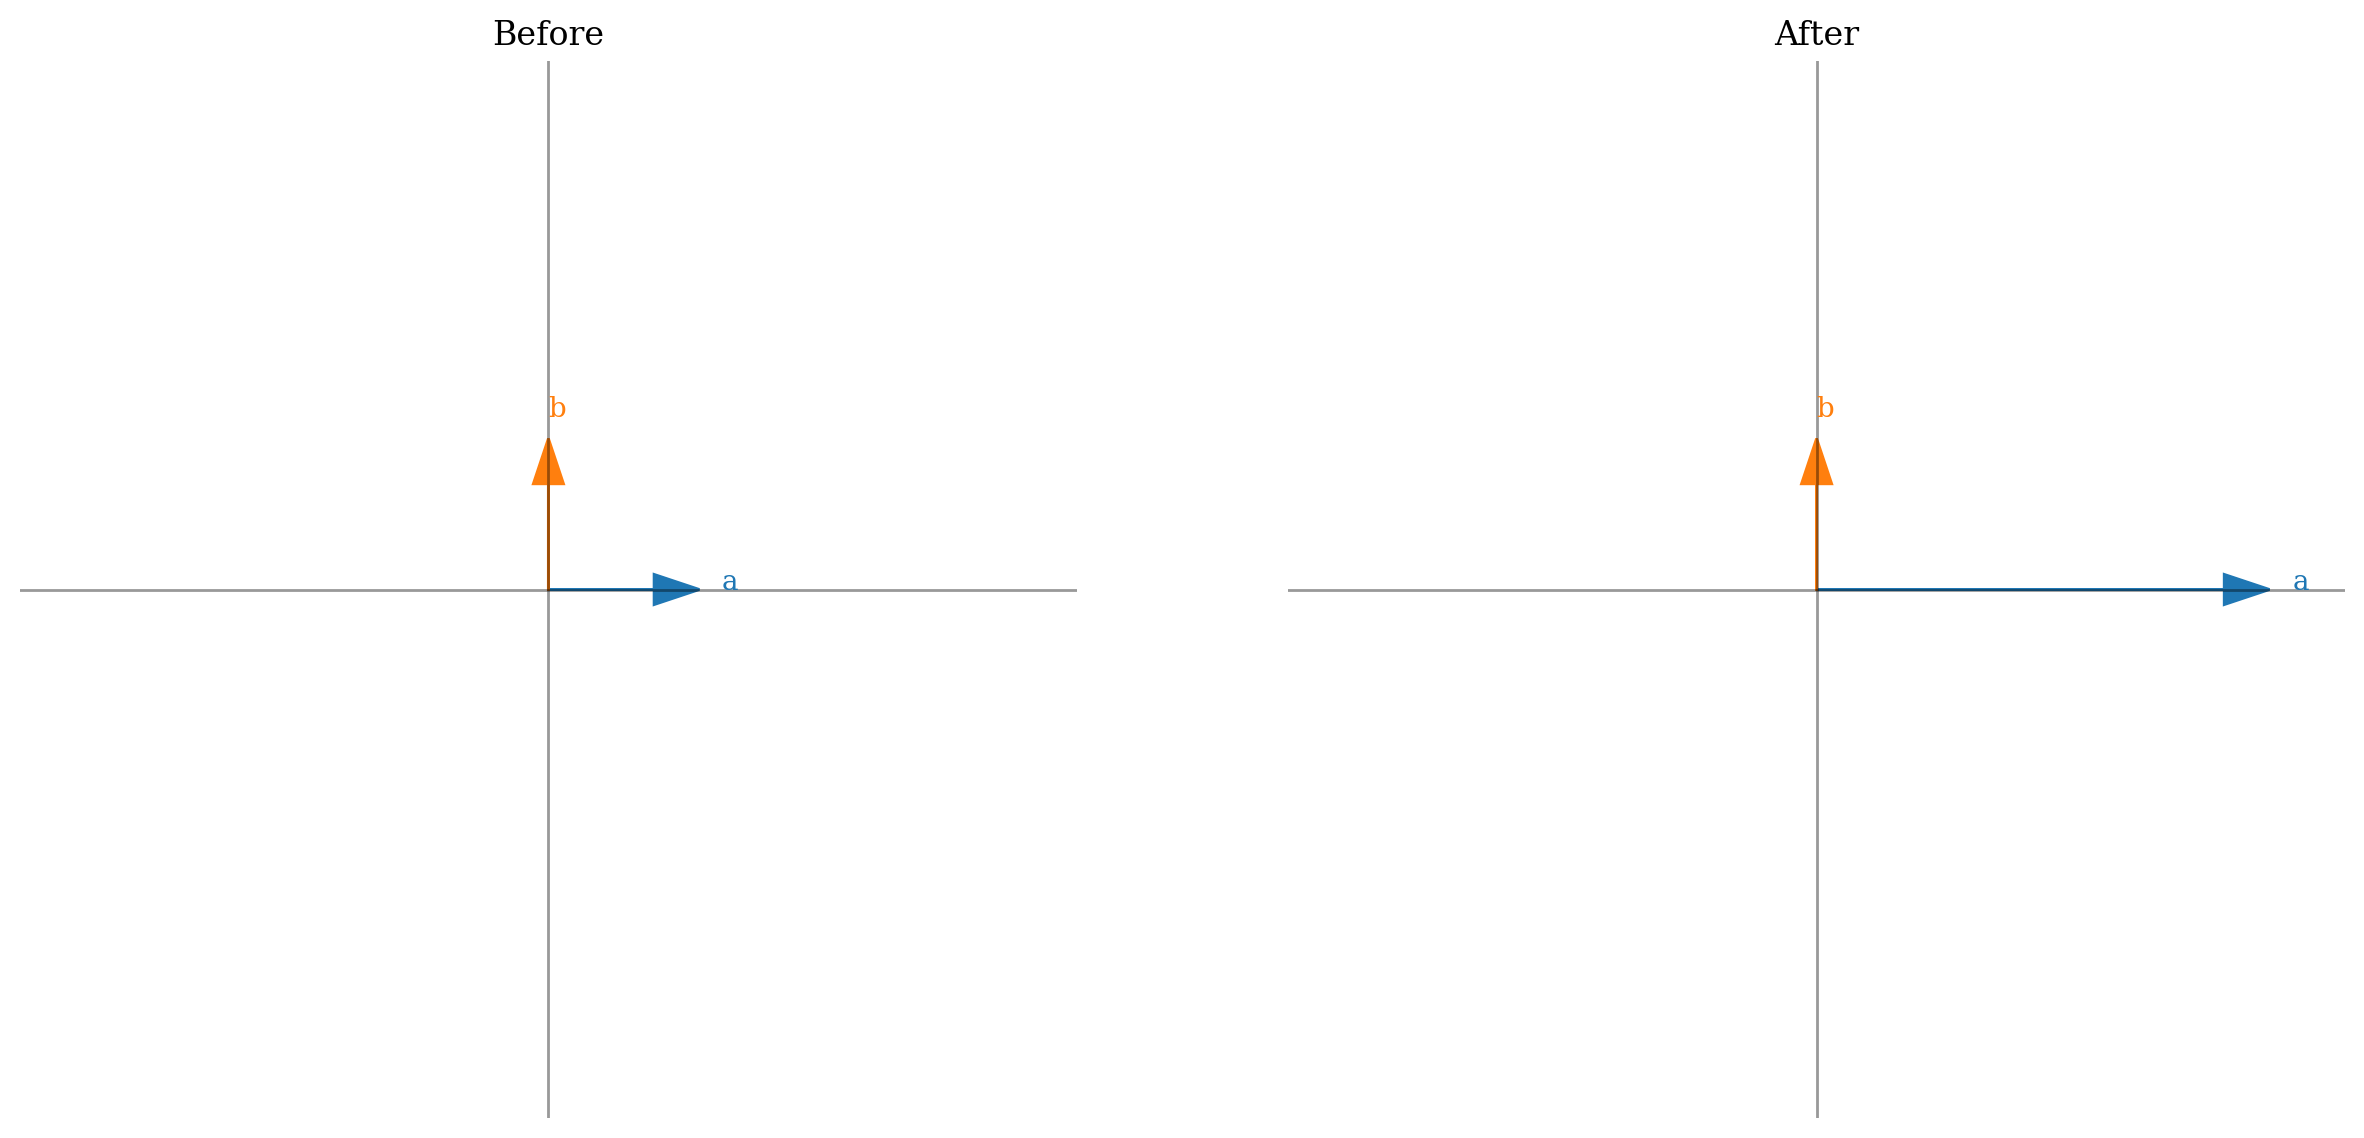

In [34]:
# Example #1
W = np.array([[3, 0], [0, 1]])
matrices.plot_eig_vec_transform(W)

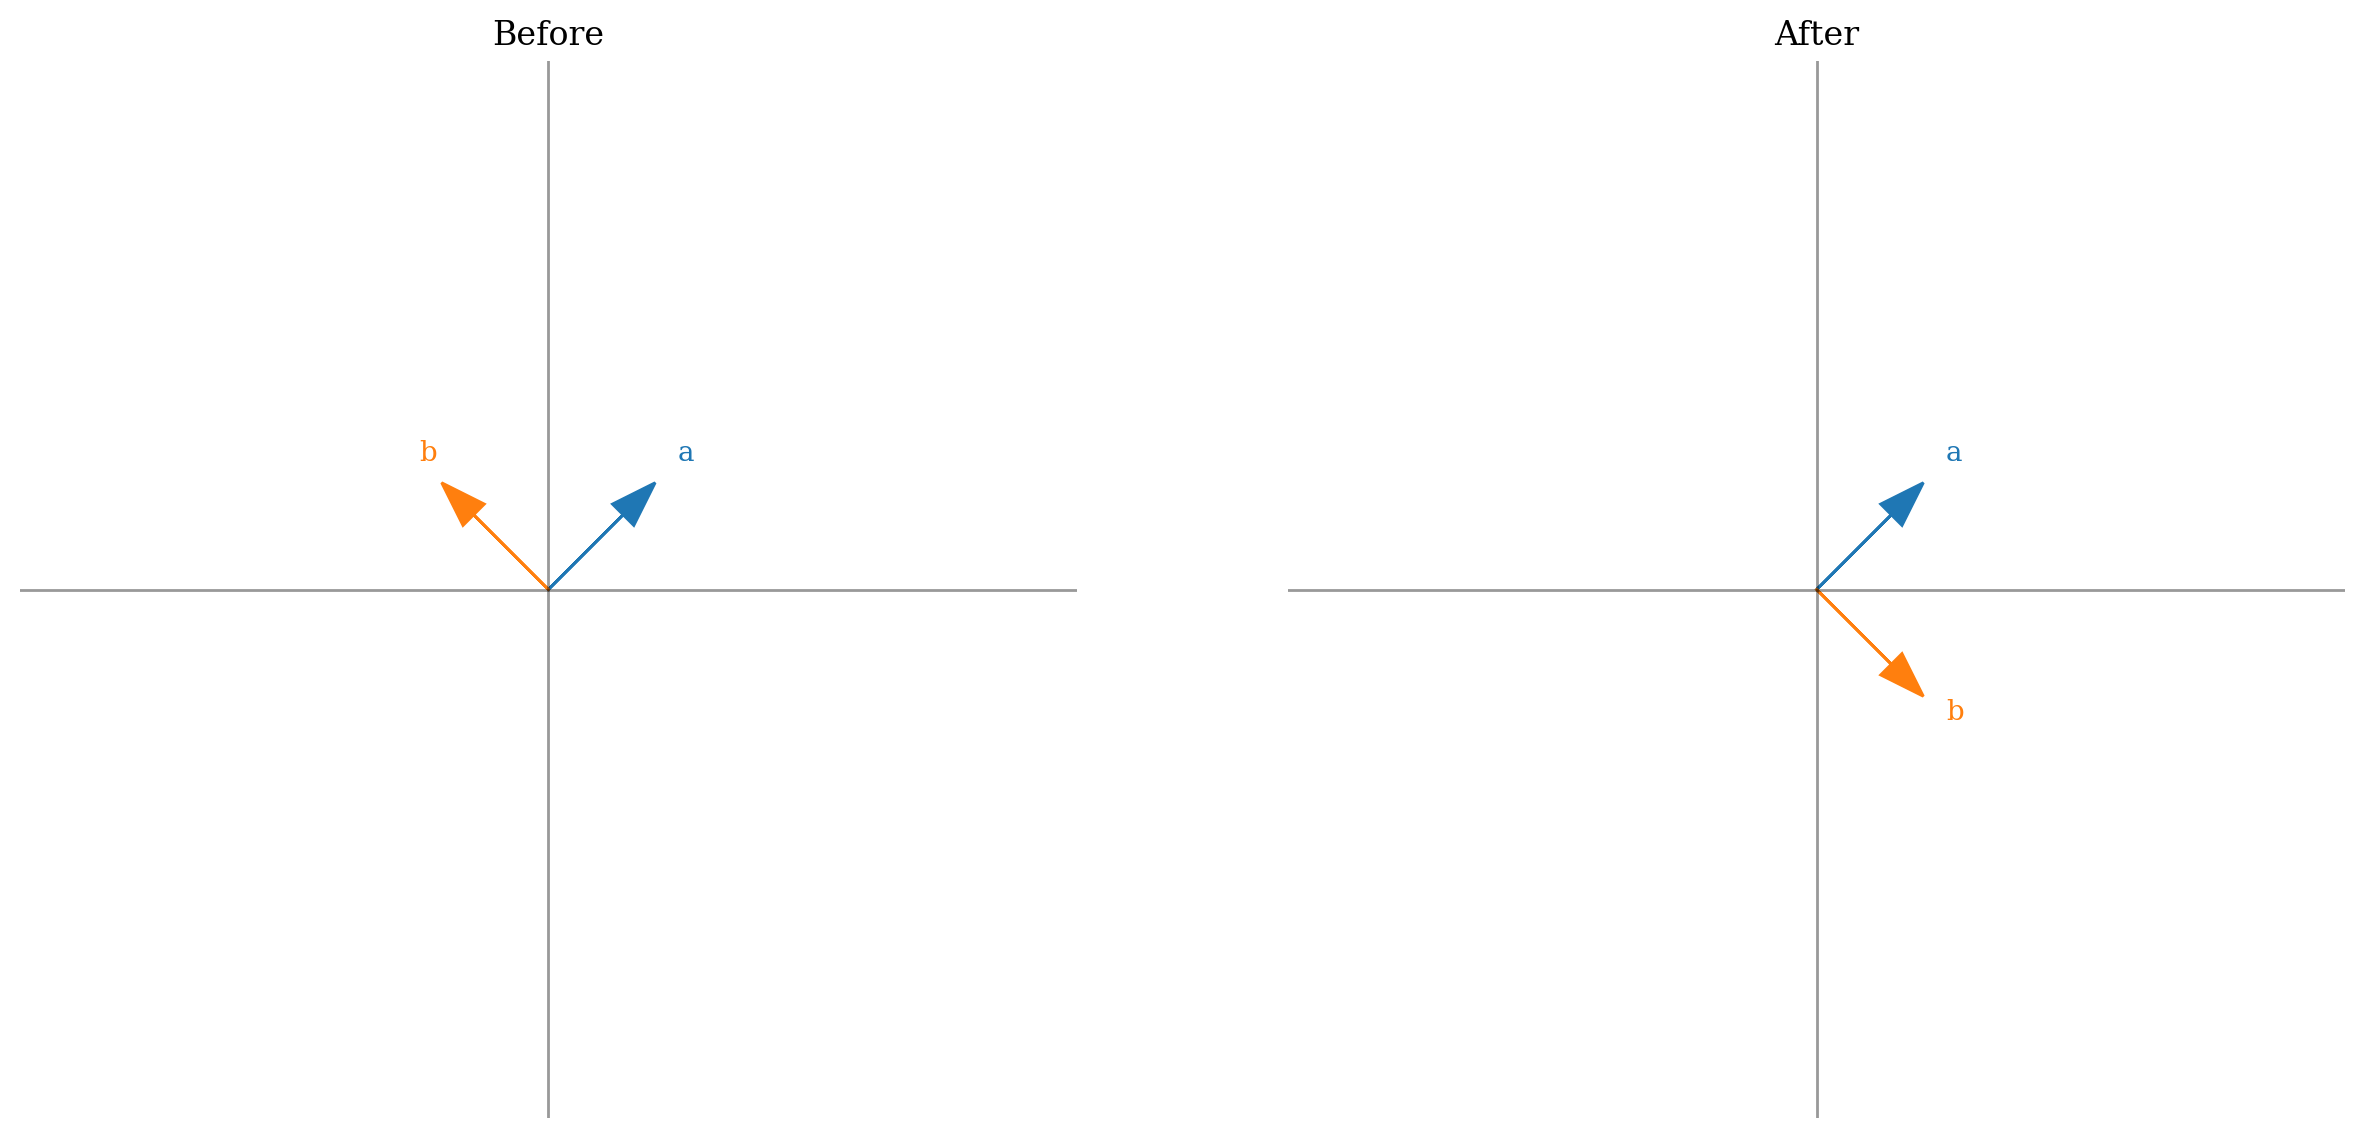

In [35]:
# Example #2
W = np.array([[0, 1], [1, 0]])
matrices.plot_eig_vec_transform(W)

As we saw above, looking at how just the eigenvectors change after a transformation can be very informative about what that transformation was.

<hr>

## About this notebook
Most of the content here is directly adapted from [Neuromatch Academy Materials](https://compneuro.neuromatch.io/tutorials/W0D3_LinearAlgebra/student/W0D3_Tutorial1.html), shared under a Creative Commons Attribution 4.0 International License.